<div dir="rtl">

**سؤال ۱:**  
سیگنال زیر را تعریف بکنید:

$$x(t) = e^{-2t} \cdot u(t)$$

با استفاده از FFT طیف آن را رسم بکنید و عرض باند مؤثر آن را بررسی بکنید.

</div>


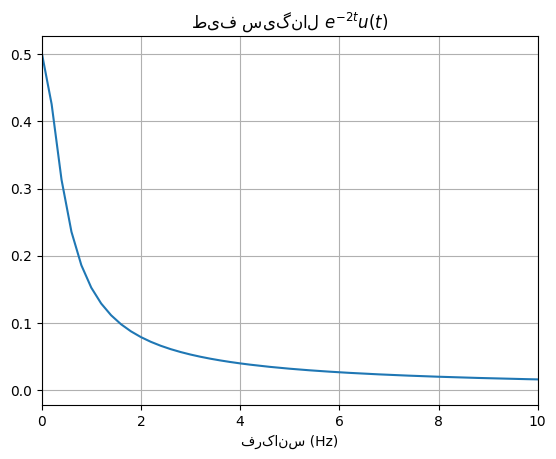

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift

t = np.linspace(0, 5, 1000)
x = np.exp(-2*t)
dt = t[1] - t[0]

X = fftshift(fft(x)) * dt
f = fftshift(fftfreq(len(t), dt))

plt.plot(f, np.abs(X))
plt.title("طیف سیگنال $e^{-2t}u(t)$")
plt.xlabel("فرکانس (Hz)")
plt.grid(True)
plt.xlim(0, 10)
plt.show()


<div dir="rtl">

**سؤال ۲:**  
سیگنال زیر را تولید بکنید:

$$x(t) = \cos(2\pi t) + \cos(4\pi t + \frac{\pi}{3})$$

با استفاده از FFT، طیف دامنه‌ای آن را رسم بکنید و فاز مؤلفه‌ها را تفسیر بکنید.

</div>


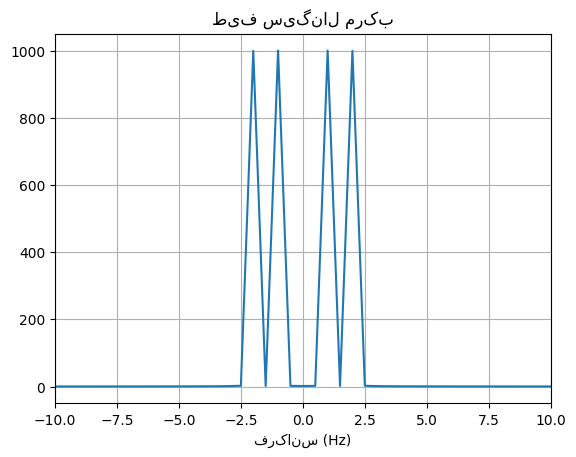

In [2]:
t = np.linspace(0, 2, 2000)
x = np.cos(2*np.pi*t) + np.cos(4*np.pi*t + np.pi/3)

X = fftshift(fft(x))
f = fftshift(fftfreq(len(t), t[1] - t[0]))

plt.plot(f, np.abs(X))
plt.title("طیف سیگنال مرکب")
plt.xlabel("فرکانس (Hz)")
plt.grid(True)
plt.xlim(-10, 10)
plt.show()


<div dir="rtl">

**سؤال ۳:**  
سیگنال زیر را در بازه‌ی $t \in [-5, 5]$ تعریف بکنید:

$$x(t) = t \cdot e^{-|t|}$$

آن را به مؤلفه‌های زوج و فرد تجزیه بکنید و هر سه را رسم بکنید.

</div>


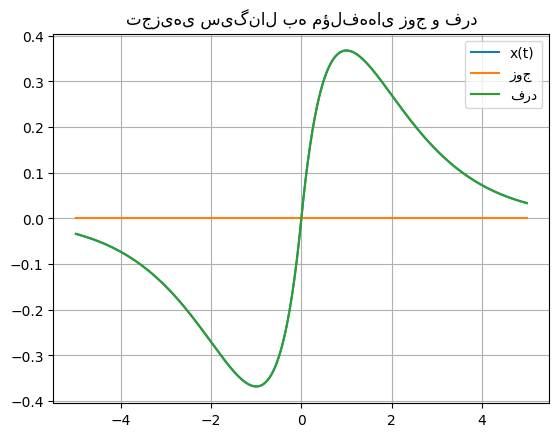

In [3]:
t = np.linspace(-5, 5, 1000)
x = t * np.exp(-np.abs(t))

x_even = (x + x[::-1]) / 2
x_odd = (x - x[::-1]) / 2

plt.plot(t, x, label="x(t)")
plt.plot(t, x_even, label="زوج")
plt.plot(t, x_odd, label="فرد")
plt.legend()
plt.title("تجزیه‌ی سیگنال به مؤلفه‌های زوج و فرد")
plt.grid(True)
plt.show()


<div dir="rtl">

**سؤال ۴:**  
فیلتر FIR زیر را طراحی بکنید:

$$h[n] = \frac{1}{5}, \quad n = 0, 1, ..., 4$$

پاسخ آن به ورودی پله واحد را به دست آورده و رسم بکنید.

</div>


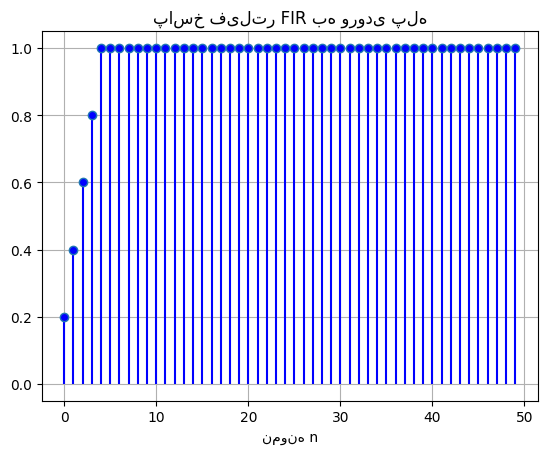

In [5]:
from scipy.signal import lfilter
import matplotlib.pyplot as plt
import numpy as np

h = np.ones(5) / 5
n = np.arange(0, 50)
u = np.ones_like(n)

y = lfilter(h, 1, u)

# نسخه‌ی بدون use_line_collection برای سازگاری بیشتر
markerline, stemlines, baseline = plt.stem(n, y, basefmt=" ")
plt.setp(markerline, 'markerfacecolor', 'b')
plt.setp(stemlines, 'color', 'b')
plt.title("پاسخ فیلتر FIR به ورودی پله")
plt.xlabel("نمونه n")
plt.grid(True)
plt.show()


<div dir="rtl">

**سؤال ۵:**  
با استفاده از دستور `firwin` فیلتر FIR پایین‌گذر با طول ۲۱ و فرکانس قطع $0.4\pi$ طراحی بکنید و پاسخ فرکانسی آن را رسم نمایید.

</div>


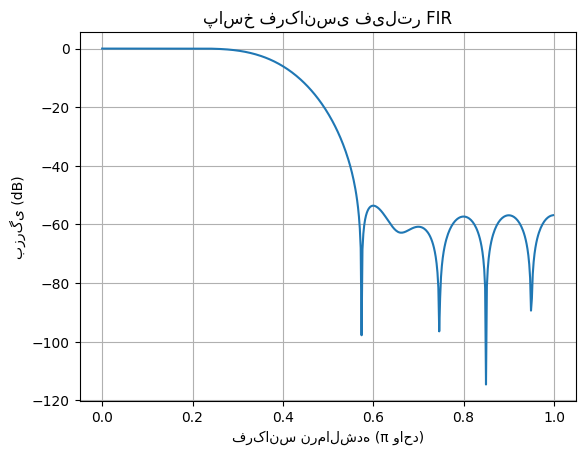

In [6]:
from scipy.signal import firwin, freqz

h = firwin(21, 0.4)
w, H = freqz(h)

plt.plot(w/np.pi, 20*np.log10(abs(H)))
plt.title("پاسخ فرکانسی فیلتر FIR")
plt.xlabel("فرکانس نرمال‌شده (π واحد)")
plt.ylabel("بزرگی (dB)")
plt.grid(True)
plt.show()


<div dir="rtl">

**سؤال ۶:**  
دو سیگنال $x_1(t) = \text{sinc}(t)$ و $x_2(t) = \text{sinc}(5t)$ را رسم بکنید. سپس طیف آن‌ها را با استفاده از FFT رسم نمایید و تفاوت گستردگی طیفی آن‌ها را بررسی بکنید.

</div>


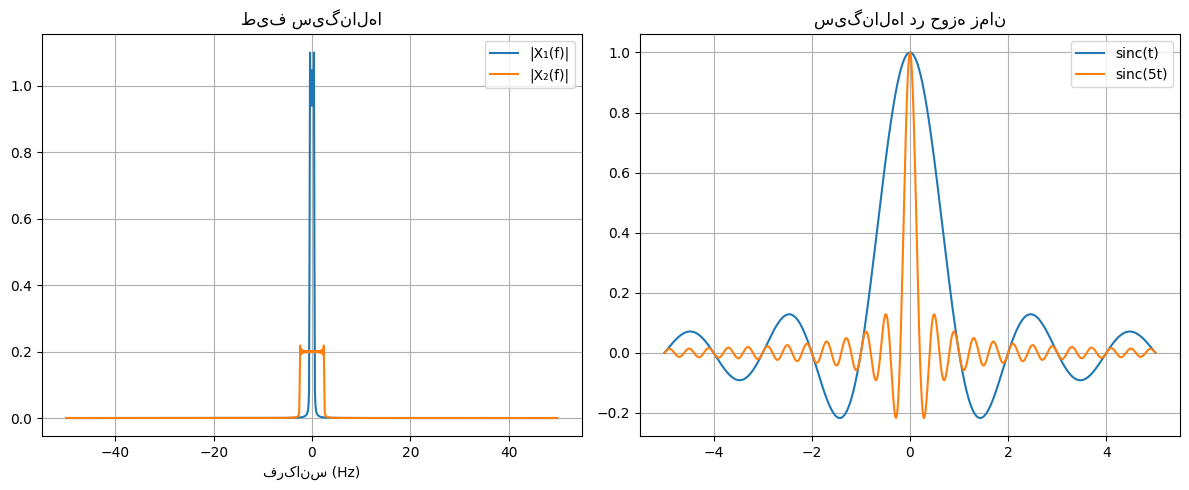

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift

t = np.linspace(-5, 5, 1000)
x1 = np.sinc(t)
x2 = np.sinc(5*t)

dt = t[1] - t[0]
f = fftshift(fftfreq(len(t), dt))

X1 = fftshift(fft(x1)) * dt
X2 = fftshift(fft(x2)) * dt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(f, np.abs(X1), label="|X₁(f)|")
plt.plot(f, np.abs(X2), label="|X₂(f)|")
plt.title("طیف سیگنال‌ها")
plt.xlabel("فرکانس (Hz)")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(t, x1, label="sinc(t)")
plt.plot(t, x2, label="sinc(5t)")
plt.title("سیگنال‌ها در حوزه زمان")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


<div dir="rtl">

**سؤال7 :**  
با استفاده از `firwin` یک فیلتر FIR بالاگذر با طول ۲۹ و فرکانس قطع $0.5\pi$ طراحی بکنید و پاسخ فرکانسی آن را رسم نمایید.

</div>


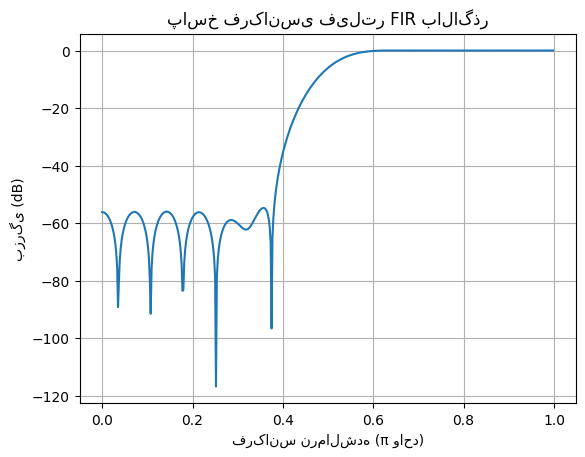

In [8]:
from scipy.signal import firwin, freqz
import matplotlib.pyplot as plt

h = firwin(29, 0.5, pass_zero=False)
w, H = freqz(h)

plt.plot(w/np.pi, 20*np.log10(np.abs(H)))
plt.title("پاسخ فرکانسی فیلتر FIR بالاگذر")
plt.xlabel("فرکانس نرمال‌شده (π واحد)")
plt.ylabel("بزرگی (dB)")
plt.grid(True)
plt.show()


<div dir="rtl">

**سؤال 8:**  
سیگنال $x(t) = \cos(2\pi t)$ را در دو حالت عادی و با تاخیر ۱ ثانیه‌ای رسم بکنید. سپس طیف هر دو را با FFT محاسبه کرده و تفاوت در فاز را بررسی بکنید.

</div>


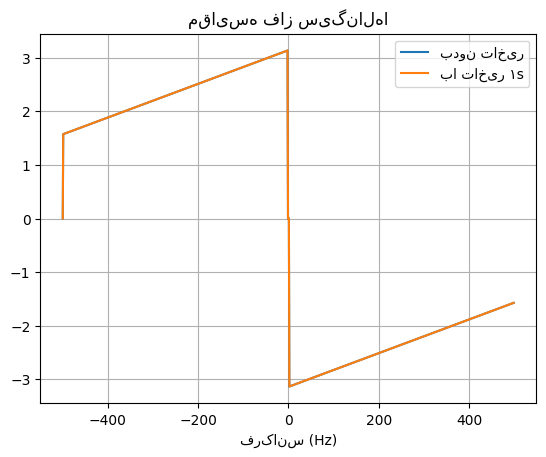

In [9]:
t = np.linspace(0, 1, 1000)
x = np.cos(2*np.pi*t)
x_delay = np.cos(2*np.pi*(t - 1))

dt = t[1] - t[0]
f = fftshift(fftfreq(len(t), dt))
X = fftshift(fft(x)) * dt
X_d = fftshift(fft(x_delay)) * dt

plt.plot(f, np.angle(X), label="بدون تاخیر")
plt.plot(f, np.angle(X_d), label="با تاخیر ۱s")
plt.title("مقایسه فاز سیگنال‌ها")
plt.xlabel("فرکانس (Hz)")
plt.legend()
plt.grid(True)
plt.show()


<div dir="rtl">

**سؤال 9:**  
سیگنال مربعی زیر را تعریف بکنید:

$$x(t) = \begin{cases} 1 & |t| < 1 \\ 0 & \text{otherwise} \end{cases}$$

آن را با DFT (برای نمونه‌برداری‌های مختلف) تحلیل بکنید و طیف آن را رسم نمایید.

</div>


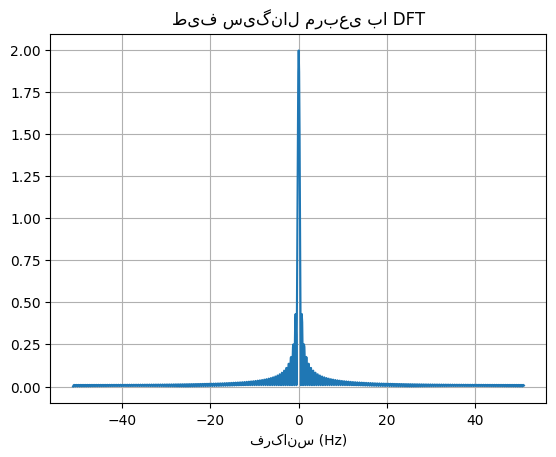

In [10]:
t = np.linspace(-5, 5, 1024)
x = np.where(np.abs(t) < 1, 1, 0)

dt = t[1] - t[0]
X = fftshift(fft(x)) * dt
f = fftshift(fftfreq(len(t), dt))

plt.plot(f, np.abs(X))
plt.title("طیف سیگنال مربعی با DFT")
plt.xlabel("فرکانس (Hz)")
plt.grid(True)
plt.show()


<div dir="rtl">

**سؤال 10:**  
سیگنال زیر را در نظر بگیرید:

$$ x(t) = \cos(2\pi t) $$

با استفاده از نمونه‌برداری در بازه‌ی $t \in [0, 5]$، توان میانگین سیگنال را محاسبه بکنید و نتیجه را نمایش دهید.

</div>


In [11]:
import numpy as np
from scipy.integrate import simpson

t = np.linspace(0, 5, 1000)
x = np.cos(2 * np.pi * t)

power = simpson(x**2, t) / (t[-1] - t[0])
print(f"توان میانگین سیگنال برابر است با: {power:.4f}")


توان میانگین سیگنال برابر است با: 0.5000
